In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os

In [2]:
# CONFIGURATION & DATA LOADING
TRAIN_FILE = 'mitbih_train.csv'
TEST_FILE = 'mitbih_test.csv'
CLASS_MAP = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}
if os.path.exists(TRAIN_FILE) and os.path.exists(TEST_FILE):
    df_train = pd.read_csv(TRAIN_FILE, header=None)
    df_test = pd.read_csv(TEST_FILE, header=None)
    df_train = df_train.astype(float)
    df_test = df_test.astype(float)
    print(f"Train shape: {df_train.shape}")
    print(f"Test shape: {df_test.shape}")
else:
    print(f"Error: Could not find {TRAIN_FILE} or {TEST_FILE}.")
    exit()

Train shape: (87554, 188)
Test shape: (21892, 188)


Saved EDA plot to 'DATA_EXPLORATION.png'


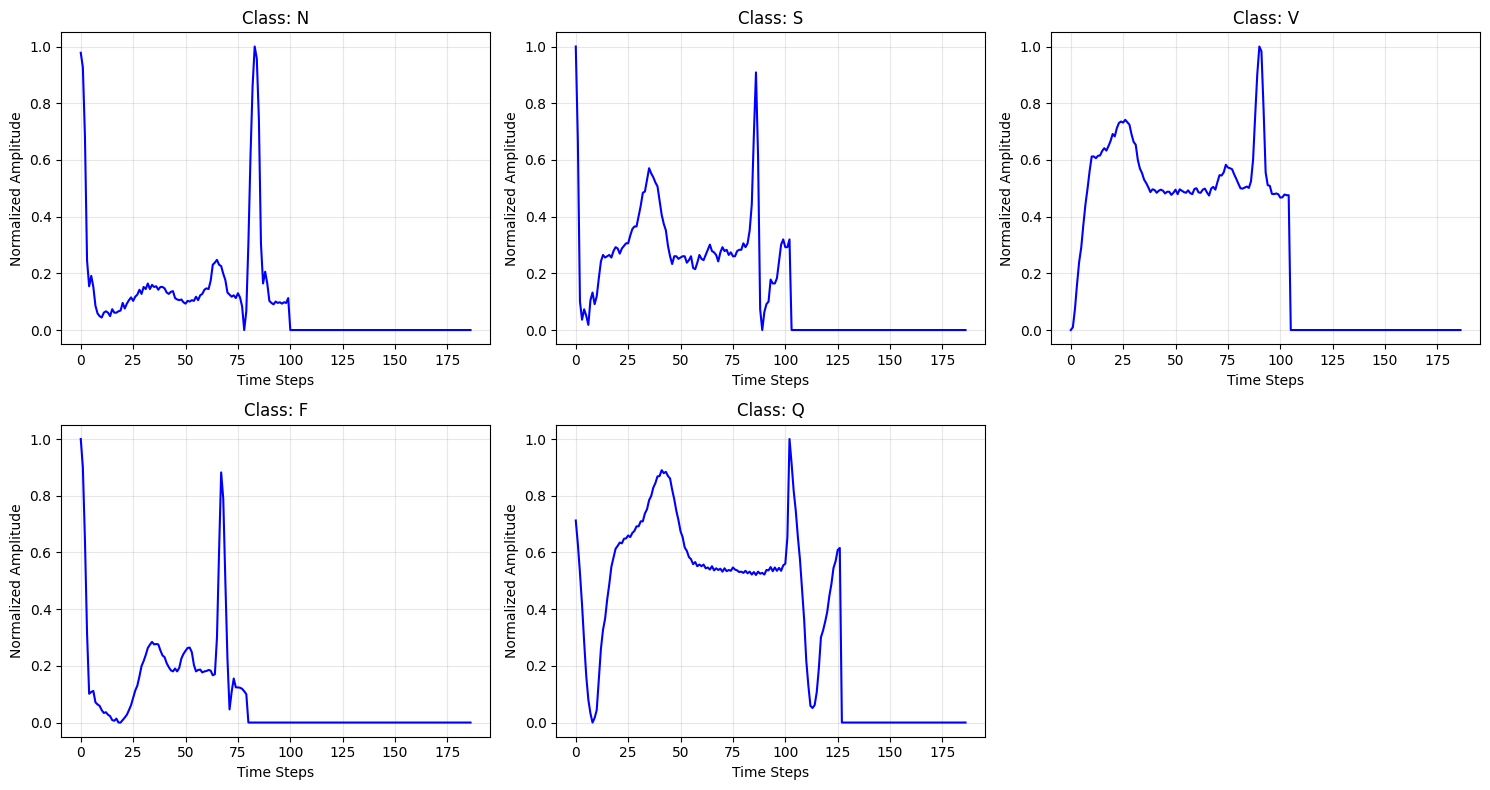

In [3]:
# EXPLORATORY DATA ANALYSIS (EDA)
unique_labels = df_train.iloc[:, -1].unique()
unique_labels.sort()
plt.figure(figsize=(15, 8))
for i, label in enumerate(unique_labels):
    sample_data = df_train[df_train.iloc[:, -1] == label].iloc[0, :-1]
    plt.subplot(2, 3, i+1)
    plt.plot(sample_data, color='blue')
    plt.title(f"Class: {CLASS_MAP.get(int(label), str(label))}")
    plt.xlabel("Time Steps")
    plt.ylabel("Normalized Amplitude")
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('DATA_EXPLORATION.png')
print("Saved EDA plot to 'DATA_EXPLORATION.png'")
plt.show()

In [4]:
# DATA PREPARATION
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].values
X_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, -1].values

In [5]:
# MODEL TRAINING
print("Training Random Forest Classifier...")
model = RandomForestClassifier(n_estimators=100, 
                               class_weight='balanced', 
                               n_jobs=-1, 
                               random_state=42)
model.fit(X_train, y_train)
print("Training completed.")

Training Random Forest Classifier...
Training completed.



Test Accuracy: 97.30%
------------------------------
Comparison with Original Paper (~98.06% acc):
Our Model (Random Forest): 97.30%
Gap: 0.76%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           N       0.97      1.00      0.98     18118
           S       0.97      0.59      0.73       556
           V       0.98      0.88      0.93      1448
           F       0.82      0.58      0.68       162
           Q       1.00      0.94      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.95      0.80      0.86     21892
weighted avg       0.97      0.97      0.97     21892

Saved Confusion Matrix to 'CONFUSION_MATRIX.png'


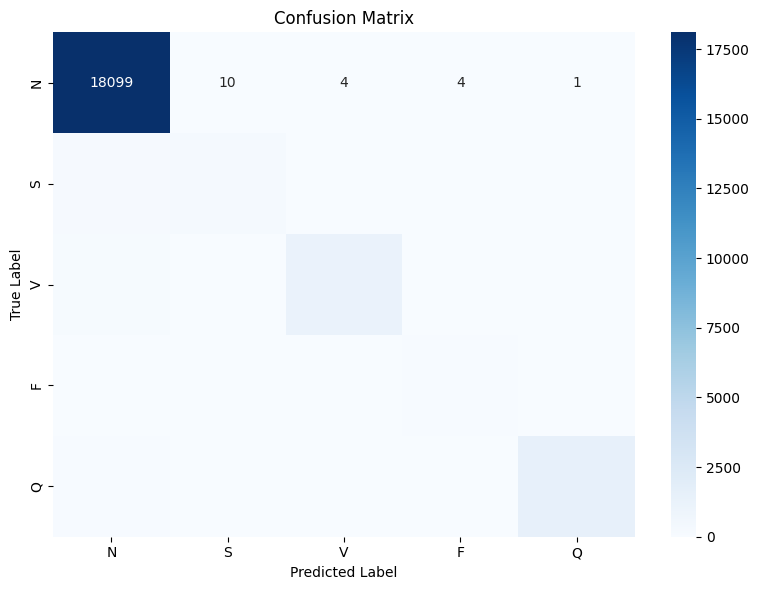

In [6]:
# EVALUATION
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {acc*100:.2f}%")
print("-" * 30)
print(f"Comparison with Original Paper (~98.06% acc):")
print(f"Our Model (Random Forest): {acc*100:.2f}%")
print(f"Gap: {98.06 - acc*100:.2f}%")
print("-" * 30)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[CLASS_MAP[i] for i in sorted(CLASS_MAP.keys())]))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[CLASS_MAP[i] for i in sorted(CLASS_MAP.keys())],
            yticklabels=[CLASS_MAP[i] for i in sorted(CLASS_MAP.keys())])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('CONFUSION_MATRIX.png')
print("Saved Confusion Matrix to 'CONFUSION_MATRIX.png'")
plt.show()